#Бејесов филтер

Очекувано време за сработување: 2 дена по 8 часа.

In [1]:
import numpy as np
import plotly.graph_objects as go

## Референци

- [Веројатносна роботика, глава 2](https://e-kursevi.feit.ukim.edu.mk/mod/resource/view.php?id=12791)
- [За Бејесовата теорема - Дерек Милер](https://www.youtube.com/watch?v=R13BD8qKeTg)
- [За Бејесовата теорема - Грант Сандерсон](https://www.youtube.com/watch?v=HZGCoVF3YvM)
- [График со стогови (анг. bar chart)](https://plotly.com/python/bar-charts/)

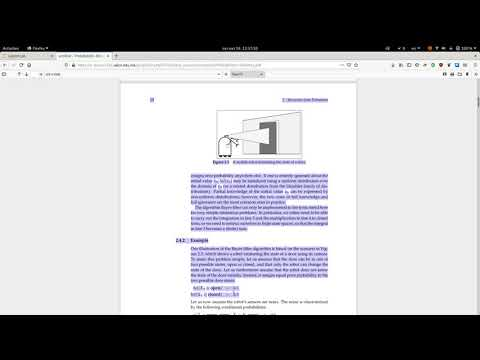

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('HLclkVra354')

In [3]:
states = ['open', 'closed']

In [4]:
# key = (new_state, control_input, current_state)
state_transition_p = {
    ('open', 'push', 'open'): 1,
    ('closed', 'push', 'open'): 0,
    ('open', 'push', 'closed'): 0.8,
    ('closed', 'push', 'closed'): 0.2,
    ('open', 'do_nothing', 'open'): 1,
    ('closed', 'do_nothing', 'open'): 0,
    ('open', 'do_nothing', 'closed'): 0,
    ('closed', 'do_nothing', 'closed'): 1
}

In [5]:
# key = (measurement, current_state)
measurement_p = {
    ('open', 'open'): 0.6,
    ('closed', 'open'): 0.4,
    ('open', 'closed'): 0.2,
    ('closed', 'closed'): 0.8
}

In [6]:
def action(real_world_door_state, u):
    """ Simulate a real world action where the robot tries to open the door. """
    if u == 'do_nothing':
        return real_world_door_state
    elif u == 'push' and real_world_door_state == 'open':
        return 'open'
    elif u == 'push' and real_world_door_state == 'closed':
        return np.random.choice(states, p=[0.8, 0.2])

In [7]:
def measure(real_world_door_state):
    """ Simulate a real world measurement by the robot's sensor. """
    if real_world_door_state == 'open':
        return np.random.choice(states, p=[0.6, 0.4])
    elif real_world_door_state == 'closed':
        return np.random.choice(states, p=[0.2, 0.8])

In [12]:
def normalize_belief(belief):
    """
    Normalize the (dictionary based) belief distribution to represent probability
    """
    return belief

In [13]:
def bayes_filter(belief, u, z):
    """
    Implements the bayes filter for a single step.
    
    Args:
        belief: current belief
        u: the control action
        z: the measurement
    
    Returns:
        belief: updated with control action `u` and measurement `z`
    """
    return belief

In [10]:
def bayes_filter_simulation(real_world_door_state, belief, simulation_steps=30):
    """ 
    Simulates the bayes filter. 
    
    Args:
        real_world_door_state: initial state of the door in the real world
        belief: the initial belief of the robot
        simulation_steps: number of steps to simulate
    
    Returns:
        logs: an array of recorded values
    """
    logs = []
    u = ['do_nothing']*simulation_steps
    for step in range(simulation_steps):
        real_world_door_state = action(real_world_door_state, u[step])
        z = measure(real_world_door_state)
        belief = bayes_filter(belief, u[step], z)
        logs.append([belief['open'], u[step], z])
    return np.array(logs)

In [11]:
initial_belief = {'open': 0.5, 'closed': 0.5}
# морам да ја напишам оваа линија бидејќи initial_belief е речник и се менува во bayes_filter_simulation()
# моментално наједноставно решение :D
initial_belief_for_fig = initial_belief['open']
real_world_door_state = 'closed'
logs = bayes_filter_simulation(real_world_door_state, initial_belief)
belief, u, z = logs.T

u_corrected = [0.95 if x == 'push' else 0.05 for x in u]
z_corrected = [1 if x == 'open' else 0 for x in z]

fig = go.FigureWidget([
    go.Scatter(x=[-1], y=[initial_belief_for_fig], name='Почетно верување'),
    go.Scatter(y=u_corrected, mode='markers', marker=dict(size=6), name='Туркање на вратата'),
    go.Scatter(y=z_corrected, mode='markers', marker=dict(symbol='x', size=6), name='Мерење'),
    go.Scatter(y=belief, name='Верување'),
])
fig

FigureWidget({
    'data': [{'name': 'Почетно верување',
              'type': 'scatter',
              'uid':…

## Задачи на кои треба да одговорите

1. Проучете ја темелно глава 2 од книгата Веројатносна роботика.
1. Разгледајте го примерот со роботот, исто така од глава 2.
1. Имплементирајте ги функциите од примерот.
    - `Функцијата normalize_belief()`.
    - `Функцијата bayes_filter()`.
1. Симулирајте ја функцијата `bayes_filter_simulation()` за 30 чекори.
1. Направете измени во `bayes_filter_simulation()` така што роботот секогаш ќе ја турка вратата кога со веројатност од 0.9 ќе биде сигурен дека вратата е затворена.
1. Направете график со стогови за распределбата на верувањето по состојби.

## Решение

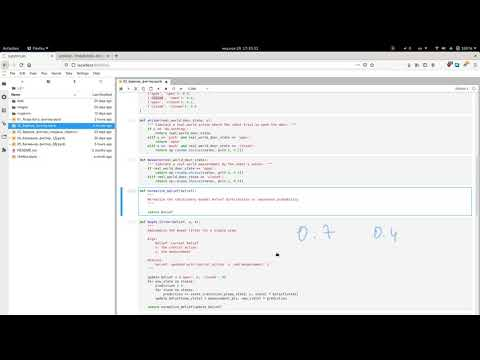

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('xu18GxkiXKk')